<a href="https://colab.research.google.com/github/naruto1206/Homework-CNN-AI/blob/main/10_m%C3%B3n_%C4%83n_Vi%E1%BB%87t_Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#Nguyễn Tiến Khoa - 19146200
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau


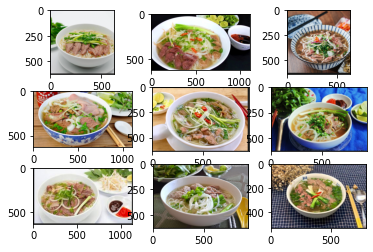

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/Data-10-món-ăn/train/Pho/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'pho' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [4]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [5]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [6]:
df["category"] = df["category"].replace({0:'pho',1:'banhmi',2:'banhxeo',3:'buncha',4:'bunrieu',5:'chetroinuoc',6:'gakho',7:'goicuon',8:'miquang',9:'thitkho'})
train_df,validate_df = train_test_split(df,test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [7]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-10-món-ăn/train/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-10-món-ăn/validation/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 400 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [30]:
history=model.fit(train_dataset,batch_size=10,epochs=40,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/40
40/40 [==============================] - 47s 1s/step - loss: 0.7697 - accuracy: 0.7700
Epoch 2/40
40/40 [==============================] - 45s 1s/step - loss: 0.8428 - accuracy: 0.7150
Epoch 3/40
40/40 [==============================] - 45s 1s/step - loss: 0.7729 - accuracy: 0.7625
Epoch 4/40
40/40 [==============================] - 46s 1s/step - loss: 0.7294 - accuracy: 0.7600
Epoch 5/40
40/40 [==============================] - 45s 1s/step - loss: 0.7325 - accuracy: 0.7425
Epoch 6/40
40/40 [==============================] - 45s 1s/step - loss: 0.9168 - accuracy: 0.6950
Epoch 7/40
40/40 [==============================] - 45s 1s/step - loss: 0.7909 - accuracy: 0.7250
Epoch 8/40
40/40 [==============================] - 45s 1s/step - loss: 0.6579 - accuracy: 0.7725
Epoch 9/40
40/40 [==============================] - 45s 1s/step - loss: 0.7485 - accuracy: 0.7800
Epoch 10/40
40/40 [==============================] - 45s 1s/step - loss: 0.6470 - accuracy: 0.7775
Epoch 11/40
40/40 [

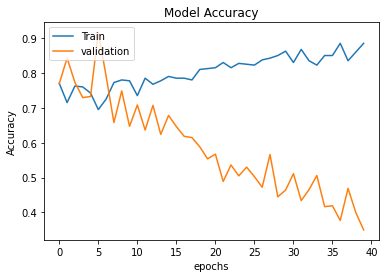

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

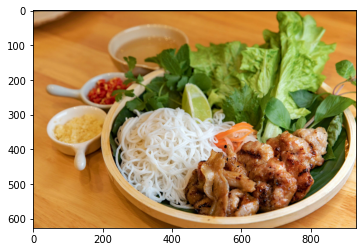

Day la bun cha


In [47]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-10-món-ăn/train/buncha/buncha2.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Pho')
elif kq ==1:
  print('Day la banh mi')
elif kq ==2:
  print('Day la banh xeo')
elif kq ==3:
  print('Day la bun cha')
elif kq ==4:
  print('Day la bun rieu')
elif kq ==5:
  print('Day la che troi nuoc')
elif kq ==6:
  print('Day la ga kho')
elif kq ==7:
  print('Day la goi cuon')
elif kq ==8:
  print('Day la mi quang')
elif kq ==9:
  print('Day la thit kho')

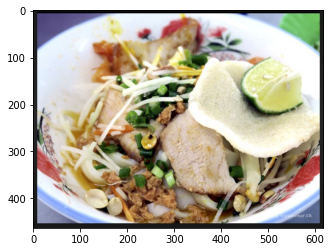

Day la mi quang


In [46]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-10-món-ăn/train/miquang/mi16.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Pho')
elif kq ==1:
  print('Day la banh mi')
elif kq ==2:
  print('Day la banh xeo')
elif kq ==3:
  print('Day la bun cha')
elif kq ==4:
  print('Day la bun rieu')
elif kq ==5:
  print('Day la che troi nuoc')
elif kq ==6:
  print('Day la ga kho')
elif kq ==7:
  print('Day la goi cuon')
elif kq ==8:
  print('Day la mi quang')
elif kq ==9:
  print('Day la thit kho')

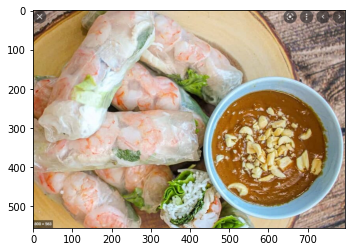

Day la goi cuon


In [49]:
filename = '/content/goicuon.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Pho')
elif kq ==1:
  print('Day la banh mi')
elif kq ==2:
  print('Day la banh xeo')
elif kq ==3:
  print('Day la bun cha')
elif kq ==4:
  print('Day la bun rieu')
elif kq ==5:
  print('Day la che troi nuoc')
elif kq ==6:
  print('Day la ga kho')
elif kq ==7:
  print('Day la goi cuon')
elif kq ==8:
  print('Day la mi quang')
elif kq ==9:
  print('Day la thit kho')

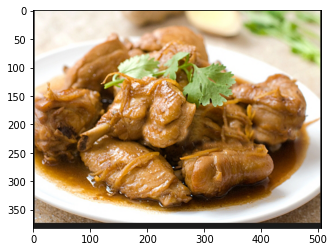

Day la ga kho


In [44]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-10-món-ăn/train/gakho/ga23.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Pho')
elif kq ==1:
  print('Day la banh mi')
elif kq ==2:
  print('Day la banh xeo')
elif kq ==3:
  print('Day la bun cha')
elif kq ==4:
  print('Day la bun rieu')
elif kq ==5:
  print('Day la che troi nuoc')
elif kq ==6:
  print('Day la ga kho')
elif kq ==7:
  print('Day la goi cuon')
elif kq ==8:
  print('Day la mi quang')
elif kq ==9:
  print('Day la thit kho')